In [2]:
#3.2 활성화 함수

def step_function(x):
    if x>0:
        return 1
    else:
        return 0

In [14]:
def step_function(x):
    y = x>0
    return y.astype(np.int32)

In [15]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
y = x > 0

In [16]:
y = y.astype(np.int32)

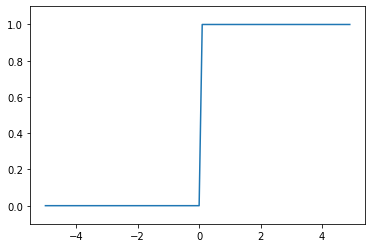

In [17]:
import matplotlib.pylab as plt
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [18]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [19]:
x = np.array([-1.0,1.0,2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


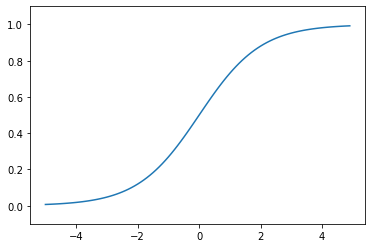

In [20]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

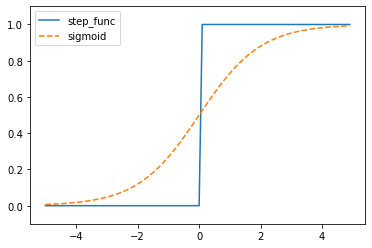

In [27]:
x = np.arange(-5.0,5.0,0.1)
y_step = step_function(x)
y_sig = sigmoid(x)
plt.plot(x,y_step,linestyle='-',label='step_func')
plt.plot(x,y_sig,linestyle='--',label='sigmoid')
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

In [28]:
def relu(x):
    return np.maximum(0,x)

In [29]:
# 3.3 다차원 배열의 계산

A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [34]:
B = np.array([[1,2],[3,4],[5,6]])
print(f"B\n {B}")
print(f"\nnp.ndim(B)\n {np.ndim(B)}")
print(f"\nB.shape \n {B.shape}")

B
 [[1 2]
 [3 4]
 [5 6]]

np.ndim(B)
 2

B.shape 
 (3, 2)


In [38]:
A = np.array([[1,2],[3,4]])
print(A.shape,"\n")
B = np.array([[5,6],[7,8]])
print(B.shape,"\n")
print(np.dot(A,B))

(2, 2) 

(2, 2) 

[[19 22]
 [43 50]]


In [39]:
A = np.array([[1,2,3],[4,5,6]])
print(A.shape)
B = np.array([[1,2],[3,4],[5,6]])
print(B.shape)
print(np.dot(A,B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [41]:
C = np.array([[1,2],[3,4]])
print(C.shape)
print(A.shape)
print(np.dot(A,C))

(2, 2)
(2, 3)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [43]:
A = np.array([[1,2],[3,4],[5,6]])
print(A.shape)
B = np.array([7,8])
print(B.shape)
print(np.dot(A,B))

(3, 2)
(2,)
[23 53 83]


In [45]:
X = np.array([1,2])
print(f'X.shape \n {X. shape}\n')
W = np.array([[1,3,5],[2,4,6]])
print(f'W \n {W}\n')
print(f'W.shape \n {W.shape}\n')
Y = np.dot(X, W)
print(f'Y \n {Y}\n')

X.shape 
 (2,)

W 
 [[1 3 5]
 [2 4 6]]

W.shape 
 (2, 3)

Y 
 [ 5 11 17]



In [46]:
# 3.4 3층 신경망 구현하기

X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(f'W1.shape \n {W1.shape}\n')
print(f'X.shape \n {X.shape}\n')
print(f'B1.shape \n {B1.shape}\n')

A1 = np.dot(X, W1) + B1

W1.shape 
 (2, 3)

X.shape 
 (2,)

B1.shape 
 (3,)



In [47]:
Z1 = sigmoid(A1)
print(f'A1 \n {A1}')
print(f'Z1 \n {Z1}')

A1 
 [0.3 0.7 1.1]
Z1 
 [0.57444252 0.66818777 0.75026011]


In [48]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

print(f'Z1.shape \n {Z1.shape}')
print(f'W2.shape \n {W2.shape}')
print(f'B2.shape \n {B2.shape}')

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

Z1.shape 
 (3,)
W2.shape 
 (3, 2)
B2.shape 
 (2,)


In [49]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [51]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y
    
network =init_network()
x = np.array([1.0, 0.5])
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


In [54]:
# 3.5 출력측 설계하기

a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a)
print(f'exp_a \n {exp_a}')
sum_exp_a = np.sum(exp_a)
print(f'sum_exp_a \n {sum_exp_a}')
y = exp_a /sum_exp_a
print(f'y (exp_a / sum_exp_a) \n {y}')

exp_a 
 [ 1.34985881 18.17414537 54.59815003]
sum_exp_a 
 74.1221542101633
y (exp_a / sum_exp_a) 
 [0.01821127 0.24519181 0.73659691]


In [55]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [57]:
a = np.array([1010,1000,990])
print(f'np.exp(a) / np.sum(np.exp(a) \n {np.exp(a) / np.sum(np.exp(a))}')
c = np.max(a)
print(f'a - c \n {a - c}')
print(f'np.exp(a - c) / np.sum(np.exp(a - c)) \n {np.exp(a - c) / np.sum(np.exp(a - c))}')

np.exp(a) / np.sum(np.exp(a) 
 [nan nan nan]
a - c 
 [  0 -10 -20]
np.exp(a - c) / np.sum(np.exp(a - c)) 
 [9.99954600e-01 4.53978686e-05 2.06106005e-09]


C:\Users\82108\AppData\Local\Temp/ipykernel_10052/3255973541.py:2: RuntimeWarning: overflow encountered in exp
  print(f'np.exp(a) / np.sum(np.exp(a) \n {np.exp(a) / np.sum(np.exp(a))}')
C:\Users\82108\AppData\Local\Temp/ipykernel_10052/3255973541.py:2: RuntimeWarning: invalid value encountered in true_divide
  print(f'np.exp(a) / np.sum(np.exp(a) \n {np.exp(a) / np.sum(np.exp(a))}')


In [58]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [59]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(f'y \n {y}')
print(f'np.sum(y) \n {np.sum(y)}')

y 
 [0.01821127 0.24519181 0.73659691]
np.sum(y) 
 1.0


In [67]:
# 3.6 손글씨 숫자 인식

import sys, os
sys.path.append('deep-learning-from-scratch-master') # 하위 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(f'x_train.shape \n {x_train.shape}')
print(f't_train.shape \n {t_train.shape}')
print(f'x_test.shape \n {x_test.shape}')
print(f't_test.shape \n {t_test.shape}')

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
x_train.shape 
 (60000, 784)
t_train.shape 
 (60000,)
x_test.shape 
 (10000, 784)
t_test.shape 
 (10000,)


In [70]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
img = x_train[0]
label = t_train[0]
print(f'label \n {label}')

print(f'img.shape \n {img.shape}')
img = img.reshape(28, 28)
print(f'img.shape \n {img.shape}')

img_show(img)

label 
 5
img.shape 
 (784,)
img.shape 
 (28, 28)


In [79]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("./deep-learning-from-scratch-master/ch03/sample_weight.pkl", 'rb') as f:
        network =pickle.load(f)
    
    return network

def predict(network, x):
    W1 ,W2, W3 = network['W1'], network['W2'], network['W3']
    b1 ,b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y
    

In [80]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy : "+ str(float(accuracy_cnt) / len(x)))

Accuracy : 0.9352


In [81]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(f'x.shape \n {x.shape}')
print(f'x[0].shape \n {x[0].shape}')
print(f'W1.shape \n {W1.shape}')
print(f'W2.shape \n {W2.shape}')
print(f'W3.shape \n {W3.shape}')

x.shape 
 (10000, 784)
x[0].shape 
 (784,)
W1.shape 
 (784, 50)
W2.shape 
 (50, 100)
W3.shape 
 (100, 10)


In [83]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy : " + str(float(accuracy_cnt) / len(x)))

Accuracy : 0.9352


In [85]:
print(f'list(range(0 , 10)) \n {list(range(0, 10))}')
print(f"list(range(0, 10 ,3)) \n {list(range(0, 10, 3))}")

list(range(0 , 10)) 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
list(range(0, 10 ,3)) 
 [0, 3, 6, 9]


In [88]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(f'y \n {y}')

y 
 [1 2 1 0]
